## Importing Packages

In [211]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading Data 

In [213]:
df = pd.read_csv('Assignment_1_MLR.csv')
df.sample(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Level_of_Disease (Y)
601,96,0,0,0,23.7,28,83
312,155,74,17,96,26.6,27,181
619,119,0,0,0,32.4,24,105
226,101,76,0,0,35.7,26,142
741,102,44,20,94,30.8,26,150
246,122,68,0,0,31.2,41,143
116,124,74,0,0,34.0,38,150
265,96,74,18,67,33.6,43,164
284,108,80,0,0,27.0,52,138
749,162,62,0,0,24.3,50,150


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Glucose               768 non-null    int64  
 1   BloodPressure         768 non-null    int64  
 2   SkinThickness         768 non-null    int64  
 3   Insulin               768 non-null    int64  
 4   BMI                   768 non-null    float64
 5   Age                   768 non-null    int64  
 6   Level_of_Disease (Y)  768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


## Exploratory Data Analysis (EDA)

### Checking Duplicate Rows

In [215]:
df.duplicated().sum()

0

### Descriptive Statistics ( Univariate Analysis)


In [216]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Level_of_Disease (Y)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,174.716146
std,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,39.175401
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,43.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,147.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,173.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,201.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,332.000000


### Plotting distribution of each variable using histograms

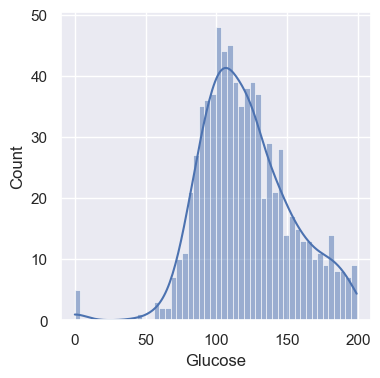

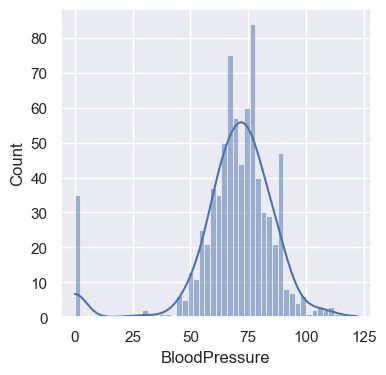

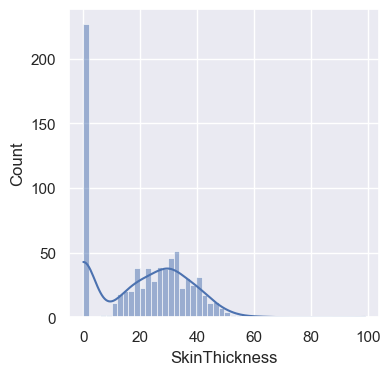

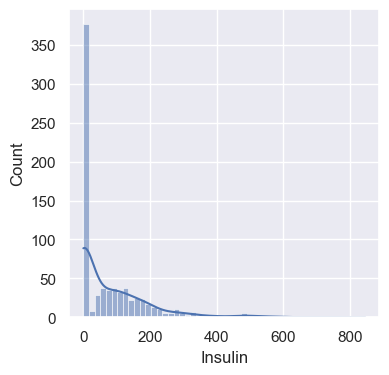

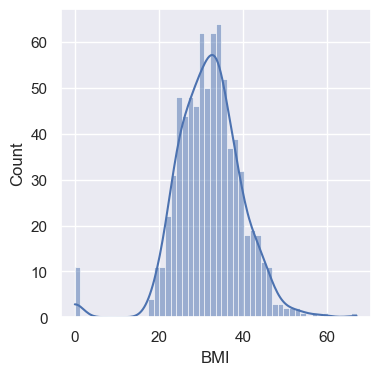

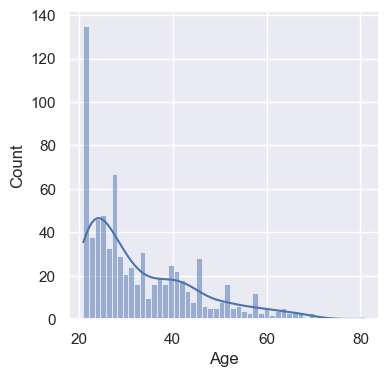

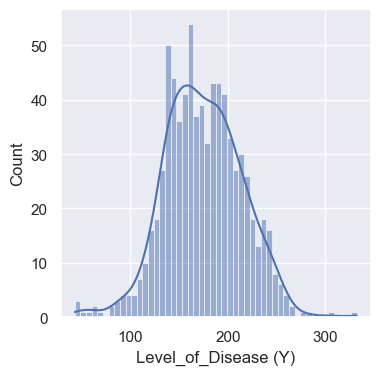

In [217]:
def distribution(df,columns):
    sns.set(rc = {'figure.figsize':(4,4)})
    sns.histplot(df[columns], bins=50,kde=True)
    plt.show()
    
for i in df.columns:
    distribution(df,i)

### We can see there are outliers in some of the columns to confirm we plot the box plots

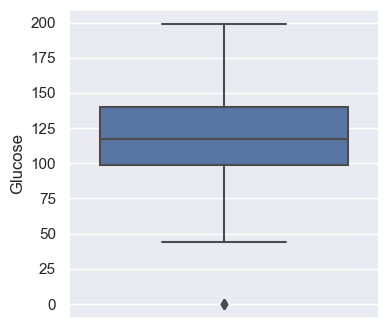

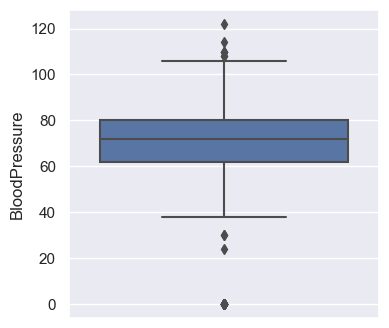

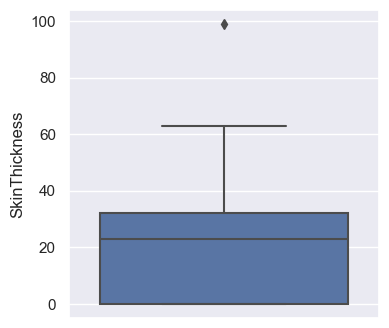

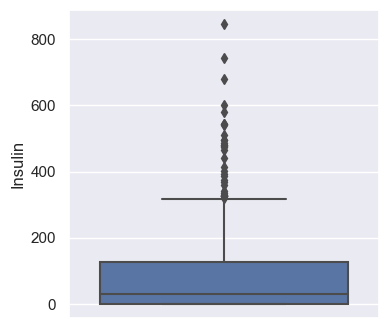

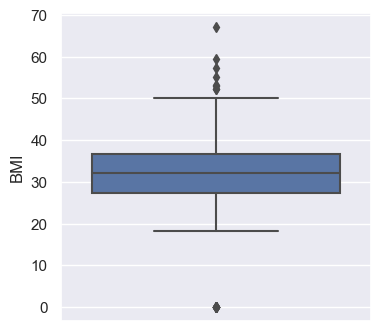

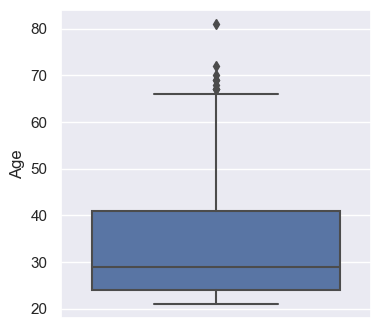

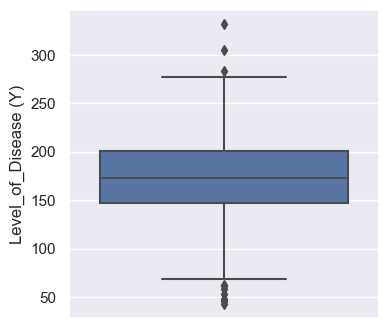

In [218]:
def boxplots(df,columns):
    sns.boxplot(y=df[columns])
    plt.show()
for i in df.columns:
    boxplots(df,i)

### Removing Outliers

In [219]:
def outliers(data,z_thresold=3):
    outliers = []
    count = 0
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i - mean)/std
        if abs(z) > 3:
            outliers.append(i)
            count+=1
    print('Number of outliers:', count)
    return sorted(outliers)  

In [220]:
for i in df.columns:
    print(i,outliers(df[i]),"\n")    

Number of outliers: 5
Glucose [0, 0, 0, 0, 0] 

Number of outliers: 35
BloodPressure [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Number of outliers: 1
SkinThickness [99] 

Number of outliers: 18
Insulin [440, 465, 474, 478, 480, 480, 485, 495, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846] 

Number of outliers: 14
BMI [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 57.3, 59.4, 67.1] 

Number of outliers: 5
Age [69, 69, 70, 72, 81] 

Number of outliers: 6
Level_of_Disease (Y) [43, 46, 48, 53, 305, 332] 



In [221]:
len(df)-(35+5+1+18+14+5+6),len(df),684/768

(684, 768, 0.890625)

In [222]:
df = df[df['Insulin']<440].reset_index(drop=True)

In [223]:
df = df[df['Glucose']!=0]
df = df[df['BloodPressure']!=0]
df = df.drop(np.where(df['SkinThickness']==99)[0])
df = df[(df['BMI']!=0) & (df['BMI']<57.3)]
df = df[df['Age']<69]
df = df[(df['Level_of_Disease (Y)']>53) & (df['Level_of_Disease (Y)']<305)].reset_index(drop=True)

In [224]:
df.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Level_of_Disease (Y)
0,148,72,35,0,33.6,50,213
1,85,66,29,0,26.6,31,162
2,183,64,0,0,23.3,32,159
3,89,66,23,94,28.1,21,157
4,137,40,35,168,43.1,33,202


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Glucose               698 non-null    int64  
 1   BloodPressure         698 non-null    int64  
 2   SkinThickness         698 non-null    int64  
 3   Insulin               698 non-null    int64  
 4   BMI                   698 non-null    float64
 5   Age                   698 non-null    int64  
 6   Level_of_Disease (Y)  698 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 38.3 KB


In [226]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Level_of_Disease (Y)
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,120.468481,72.255014,20.871060,72.614613,32.240831,33.153295,177.024355
std,30.081186,12.337123,15.369966,90.137432,6.634641,11.415248,33.733843
min,44.000000,24.000000,0.000000,0.000000,18.200000,21.000000,95.000000
25%,99.000000,64.000000,0.000000,0.000000,27.400000,24.000000,150.000000
50%,115.000000,72.000000,23.000000,43.500000,32.000000,29.000000,174.000000
75%,139.000000,80.000000,32.000000,125.750000,36.475000,41.000000,201.000000
max,199.000000,122.000000,60.000000,415.000000,55.000000,68.000000,277.000000


for i in df.columns:
    boxplots(df,i)

## Bivariate Analysis

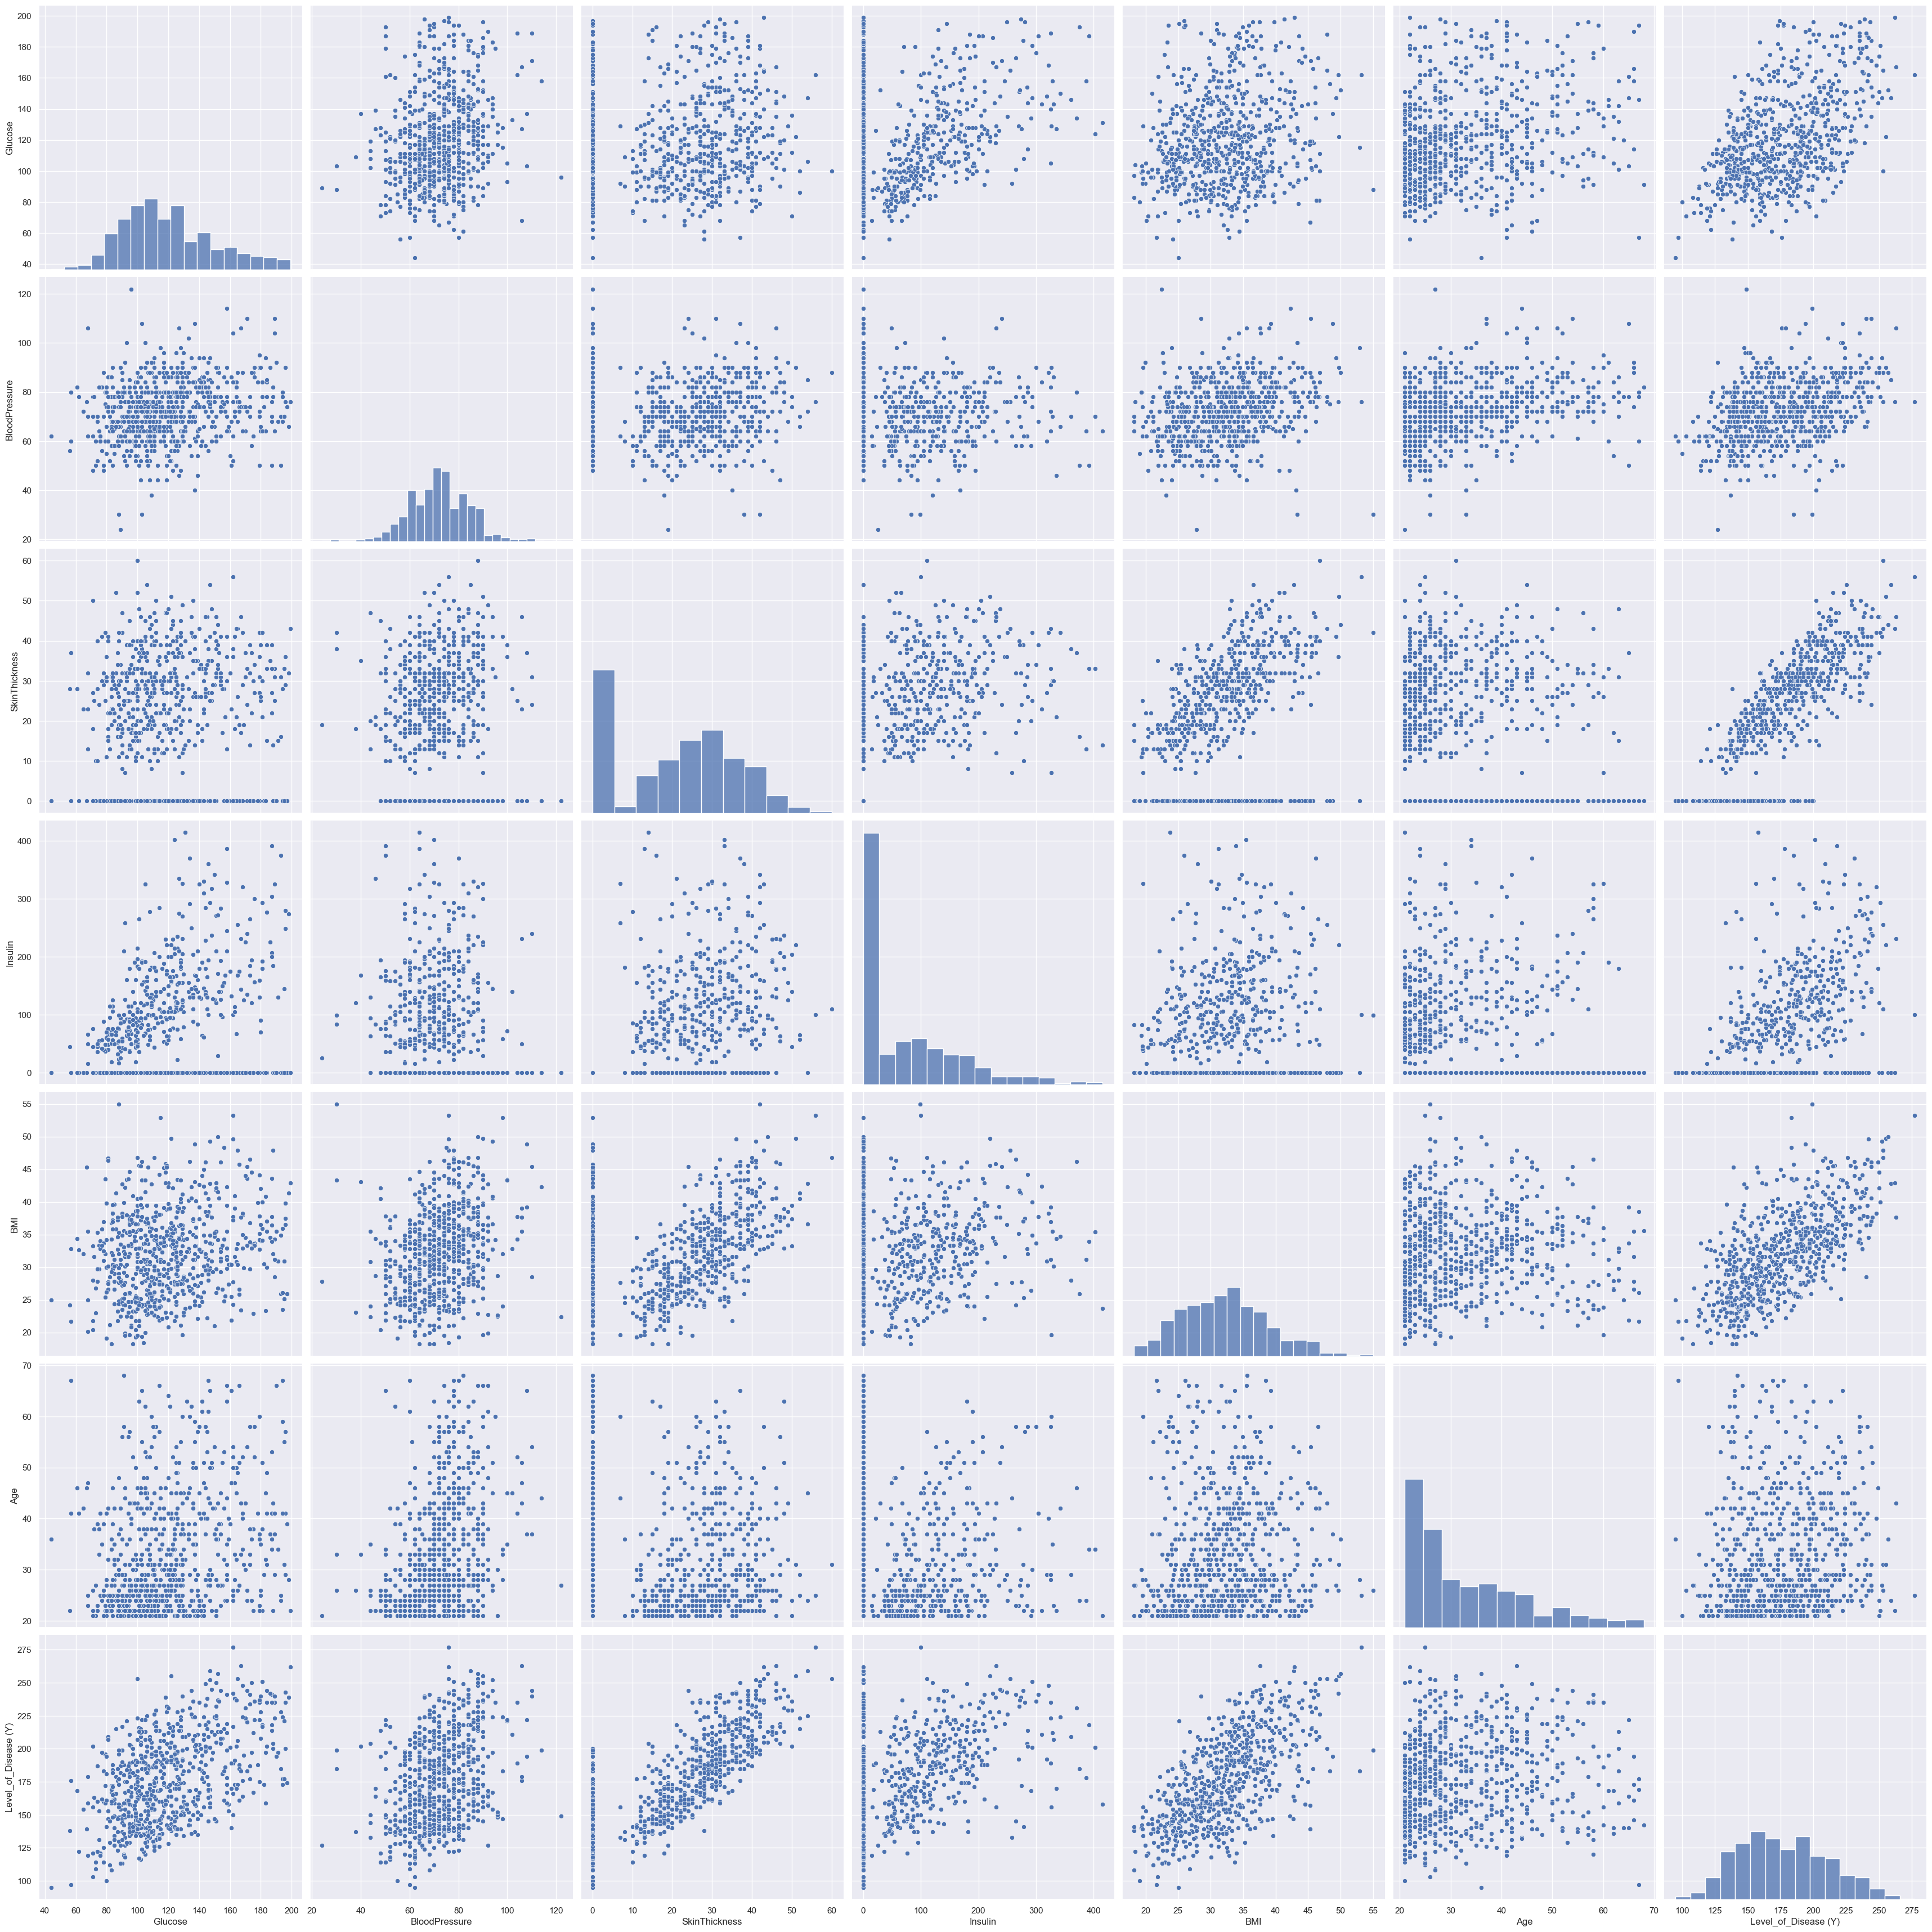

In [227]:
sns.pairplot(df, height= 5, kind = 'scatter') 

## Preparation of Data before Training the algorithm

### Spliting into dependent and independent variable

In [228]:
features = list(set(df.columns)-set(['Level_of_Disease (Y)']))
features

['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age', 'SkinThickness']

In [229]:
target = ['Level_of_Disease (Y)']
target

['Level_of_Disease (Y)']

In [230]:
x = df.drop(target, axis=1)
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,148,72,35,0,33.6,50
1,85,66,29,0,26.6,31
2,183,64,0,0,23.3,32
3,89,66,23,94,28.1,21
4,137,40,35,168,43.1,33


In [231]:
y = df[target]
y.head()

,Level_of_Disease (Y)
0,213
1,162
2,159
3,157
4,202


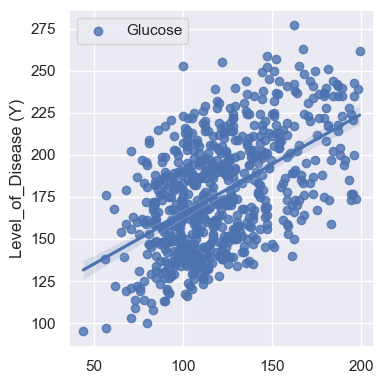

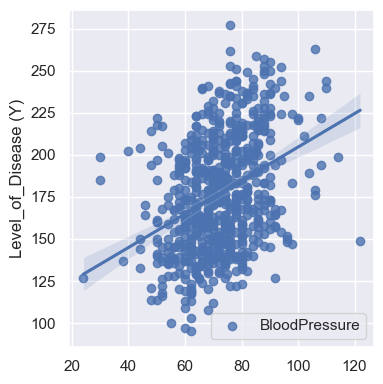

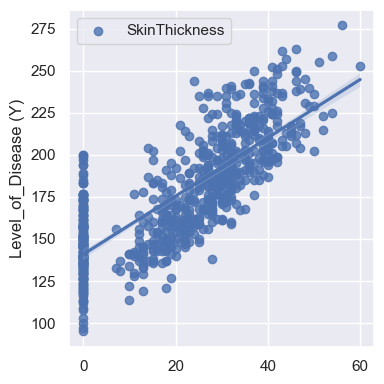

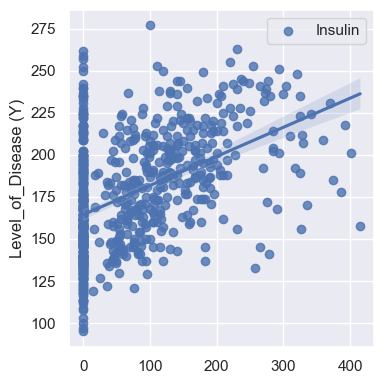

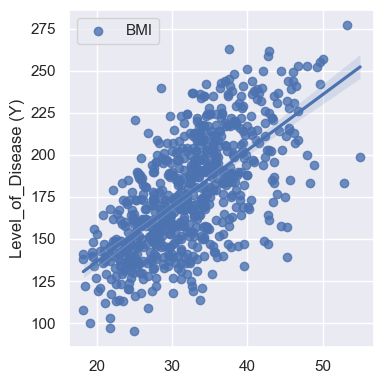

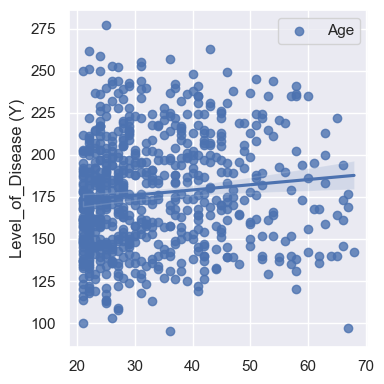

In [232]:
for col in x.columns:
    plt.figure()
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Feature Scaling

In [233]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)

In [234]:
sc_x.head()

,0,1,2,3,4,5
0,0.915897,-0.020685,0.919916,-0.806177,0.205006,1.476865
1,-1.179937,-0.507371,0.529264,-0.806177,-0.850819,-0.188769
2,2.080249,-0.669600,-1.358886,-0.806177,-1.348565,-0.101104
3,-1.046869,-0.507371,0.138612,0.237423,-0.624570,-1.065418
4,0.549957,-2.616343,0.919916,1.058981,1.637912,-0.013439


 ### Multi-collinearity check

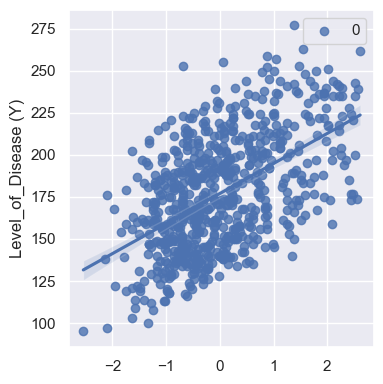

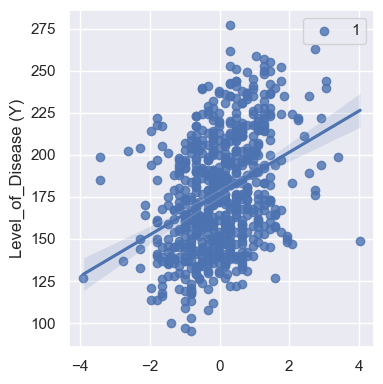

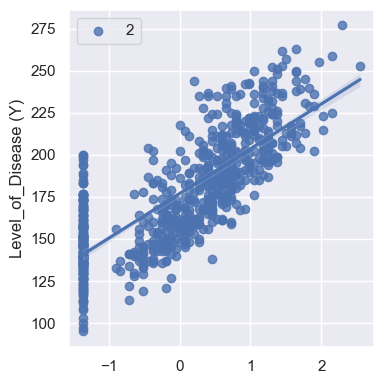

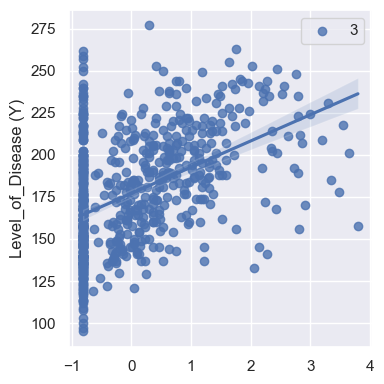

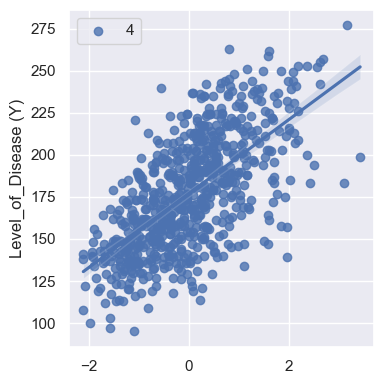

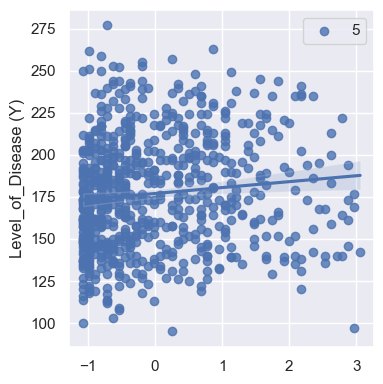

In [235]:
for col in sc_x.columns:
    plt.figure()
    sns.regplot(x=sc_x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [236]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Level_of_Disease (Y)
Glucose,1.000000,0.233089,0.015395,0.263993,0.205554,0.266989,0.529725
BloodPressure,0.233089,1.000000,-0.002164,-0.076685,0.265762,0.353290,0.363744
SkinThickness,0.015395,-0.002164,1.000000,0.460626,0.384252,-0.148027,0.789010
Insulin,0.263993,-0.076685,0.460626,1.000000,0.164404,-0.080326,0.462628
BMI,0.205554,0.265762,0.384252,0.164404,1.000000,0.063560,0.650415
Age,0.266989,0.353290,-0.148027,-0.080326,0.063560,1.000000,0.104517
Level_of_Disease (Y),0.529725,0.363744,0.789010,0.462628,0.650415,0.104517,1.000000


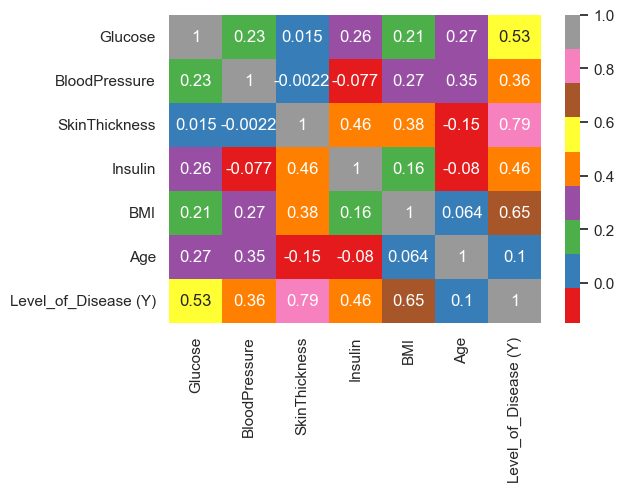

In [237]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='Set1')
plt.show()

### VIF (Multi-collinearity Check)

In [238]:
## from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : x.columns}
     
vif = pd.DataFrame(data)

In [239]:
vif

,VIF,Features
0,1.267634,Glucose
1,1.264238,BloodPressure
2,1.529053,SkinThickness
3,1.430497,Insulin
4,1.316161,BMI
5,1.228105,Age


## **CASE- 1 : Test size = 0.3 **

### Split the data into training and test for building the model and for prediction

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) #unscaled x
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(488, 6) (210, 6) (488, 1) (210, 1)


## Training Model - Multiple Linear Regression

In [241]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [242]:
LR.coef_,LR.intercept_

(array([[0.46654788, 0.54816979, 1.49980417, 0.00508727, 1.25168816,
         0.02717977]]),
 array([8.29641184]))

### Prediction of target variable using Linear Regression model

In [243]:
pred_y_train = LR.predict(x_train) #unscaled x
MLR_3_Train_r2 = r2_score(y_train, pred_y_train)

In [244]:
err_train = y_train - pred_y_train

In [245]:
pred_y_test = LR.predict(x_test)
MLR_3_Test_r2 = r2_score(y_test, pred_y_test)

In [246]:
print ('Train R2 score :', MLR_3_Train_r2,'\n' 'Test R2 Score   :', MLR_3_Test_r2)

Train R2 score : 0.9999280196937471 
Test R2 Score   : 0.9999378630934285


In [247]:
err_test = y_test - pred_y_test

In [248]:
err_train.skew(),err_train.kurtosis()

(Level_of_Disease (Y)   -0.08803
 dtype: float64,
 Level_of_Disease (Y)   -1.110461
 dtype: float64)

In [249]:
err_test.skew(),err_test.kurtosis()

(Level_of_Disease (Y)   -0.042607
 dtype: float64,
 Level_of_Disease (Y)   -1.117351
 dtype: float64)

In [250]:
# mse, rmse, mape, accuracy, using formatted string literals

MSE = mean_squared_error(y_test,pred_y_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,pred_y_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

1. mean squared error (MSE) =  0.07410722091846768
2. root mean squared error (RMSE) = 0.2722264148066232
3. mean absolute percentage error (MAPE) = 0.001355097858846833
4. accuracy of the model = 99.86449021411532


## Training Model - Ordinary Least Square (OLS) Method

In [251]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [252]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit() #unscaled x
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Level_of_Disease (Y)   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          1.829e+06
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):                        0.00
Time:                          21:44:23   Log-Likelihood:                         -778.49
No. Observations:                   488   AIC:                                      1569.
Df Residuals:                       482   BIC:                                      1594.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Glucose           0.4781      0.002    244.643      0.000       0.474       0.482
BloodPressure     0.6031      0.004    144.796      0.000       0.595       0.611
SkinThickness     1.5036      0.004    337.260      0.000       1.495       1.512
Insulin           0.0051      0.001      7.216      0.000       0.004       0.007
BMI               1.3263      0.009    155.983      0.000       1.310       1.343
Age               0.0364      0.005      6.947      0.000       0.026       0.047
==============================================================================
Omnibus:                        4.779   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.875
Skew:                          -0.232   Prob(JB):                       0.0874
Kurtosis:                       2.842   Cond. No.                         29.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
reg_model = smf.OLS(endog = y_test, exog=x_test).fit() #unscaled X
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Level_of_Disease (Y)   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          8.627e+05
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):                        0.00
Time:                          21:44:23   Log-Likelihood:                         -324.47
No. Observations:                   210   AIC:                                      660.9
Df Residuals:                       204   BIC:                                      681.0
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Glucose           0.4769      0.003    164.114      0.000       0.471       0.483
BloodPressure     0.6048      0.006     94.765      0.000       0.592       0.617
SkinThickness     1.5003      0.006    243.831      0.000       1.488       1.512
Insulin           0.0051      0.001      4.602      0.000       0.003       0.007
BMI               1.3268      0.014     98.079      0.000       1.300       1.353
Age               0.0363      0.008      4.651      0.000       0.021       0.052
==============================================================================
Omnibus:                        7.154   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.232
Skew:                          -0.154   Prob(JB):                        0.121
Kurtosis:                       2.377   Cond. No.                         31.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Assumption of LR Model

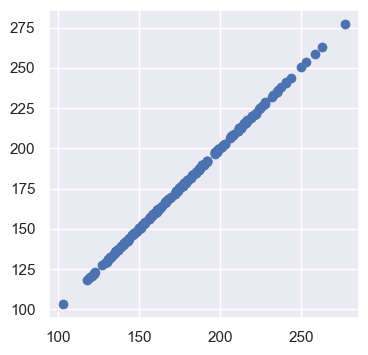

In [254]:
# Check linearity

plt.scatter(y_test,  pred_y_test)

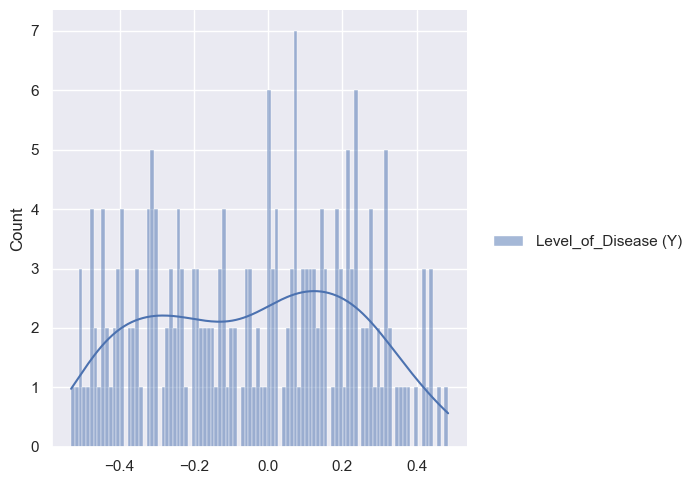

In [255]:
# Normality of Residual

sns.displot((y_test - pred_y_test), bins=100,kde=True)
plt.show()

1) Linearity - Satisfied<br>
2) Normality of Residuals- Satisfied/notSatisfied(confusion)<br>
3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)<br>
4) No autocorrelation - Satisfied [Durbin-Watson values are in the vicinity of the value 2 : If the value are between 1.5-2.5, Autocorrelation is likely not present]<br>
5) No or little Multicollinearity - satisfied

## Lasso (L1 reguralization):


In [256]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train) #unscaled x
print("Lasso Model :", (lasso.coef_))
pred_y_train_lasso = lasso.predict(x_train)
pred_y_test_lasso = lasso.predict(x_test)
lasso_3_r2_train = r2_score(y_train, pred_y_train_lasso)
print("Training Accuracy :", lasso_3_r2_train)
print()
lasso_3_r2_test = r2_score(y_test, pred_y_test_lasso)
print("Test Accuracy :", lasso_3_r2_test)

Lasso Model : [0.46660798 0.54798986 1.49957228 0.00509969 1.24975641 0.02648504]
Training Accuracy : 0.9999277536585682

Test Accuracy : 0.9999372713915554


## Ridge (L2 Regularization):

In [257]:
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train) #unscaled x
print("Ridge Model :", (ridge.coef_))
pred_y_train_ridge = ridge.predict(x_train)
pred_y_test_ridge = ridge.predict(x_test)
ridge_3_r2_train = r2_score(y_train, pred_y_train_ridge)
print("Training Accuracy :", ridge_3_r2_train)
print()
ridge_3_r2_test = r2_score(y_test, pred_y_test_ridge)
print("Test Accuracy :", ridge_3_r2_test)

Ridge Model : [[0.46654806 0.54816978 1.49980178 0.00508761 1.25167229 0.02717992]]
Training Accuracy : 0.9999280196808276

Test Accuracy : 0.999937861086465


## ElasticNet

In [258]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
pred_y_train_elastic = elastic.predict(x_train)
pred_y_test_elastic = elastic.predict(x_test)
elastic_3_r2_train = r2_score(y_train, pred_y_train_elastic)
print("Training Accuracy :", elastic_3_r2_train)
print()
elastic_3_r2_test = r2_score(y_test, pred_y_test_elastic)
print("Test Accuracy :", elastic_3_r2_test)

Training Accuracy : 0.9999251188694418

Test Accuracy : 0.999934336276695


## Gradient Descent

In [259]:
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.3, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor() #Stochastic Gradient Descent
gd.fit(x_train, y_train)
pred_y_gd_train = gd.predict(x_train)
pred_y_gd_test = gd.predict(x_test)
Train_3_accuracy_gd =r2_score(y_train, pred_y_gd_train)
Test_3_accuracy_gd = r2_score(y_test, pred_y_gd_test)

print("GD Trainging Accuracy :", Train_3_accuracy_gd  )
print("GD Test Accuracy      :",Test_3_accuracy_gd  )

x_train shape : (488, 6) 
x_test shape : (210, 6) 
y_train shape : (488, 1) 
y_test shape : (210, 1)

GD Trainging Accuracy : 0.999927930546626
GD Test Accuracy      : 0.9999335761995654


C:\Users\DARIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **CASE- 2 : Test size = 0.25**

### Training Model - Multiple Linear Regression

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10) #unscaled x
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

LR = LinearRegression()
LR.fit(x_train, y_train)
print("LR.coef_",LR.coef_,'LR.intercept_',LR.intercept_)

pred_y_train = LR.predict(x_train) #unscaled x
MLR_25_Train_r2 = r2_score(y_train, pred_y_train)
err_train = y_train - pred_y_train

pred_y_test = LR.predict(x_test)
MLR_25_Test_r2 = r2_score(y_test, pred_y_test)
print ('Train R2 score :', MLR_25_Train_r2,'\n' 'Test R2 Score   :', MLR_25_Test_r2)
err_test = y_test - pred_y_test

print('err_train.skew',err_train.skew(),'err_train.kurtosis',err_train.kurtosis())
print('err_test.skew',err_test.skew(),'err_test.kurtosis',err_test.kurtosis())

# mse, rmse, mape, accuracy, using formatted string literals

MSE = mean_squared_error(y_test,pred_y_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,pred_y_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

(523, 6) (175, 6) (523, 1) (175, 1)
LR.coef_ [[0.46647488 0.54847796 1.49966138 0.00510587 1.25194743 0.0267344 ]] LR.intercept_ [8.28369134]
Train R2 score : 0.999927546195399 
Test R2 Score   : 0.9999414946143965
err_train.skew Level_of_Disease (Y)   -0.06335
dtype: float64 err_train.kurtosis Level_of_Disease (Y)   -1.140275
dtype: float64
err_test.skew Level_of_Disease (Y)   -0.107737
dtype: float64 err_test.kurtosis Level_of_Disease (Y)   -1.050937
dtype: float64
1. mean squared error (MSE) =  0.07032491392191839
2. root mean squared error (RMSE) = 0.26518844982751116
3. mean absolute percentage error (MAPE) = 0.001329134172463102
4. accuracy of the model = 99.86708658275369


### Training Model - Ordinary Least Square (OLS) Method

                                  OLS Regression Results                                 
Dep. Variable:     Level_of_Disease (Y)   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          1.961e+06
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):                        0.00
Time:                          21:44:25   Log-Likelihood:                         -835.58
No. Observations:                   523   AIC:                                      1683.
Df Residuals:                       517   BIC:                                      1709.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

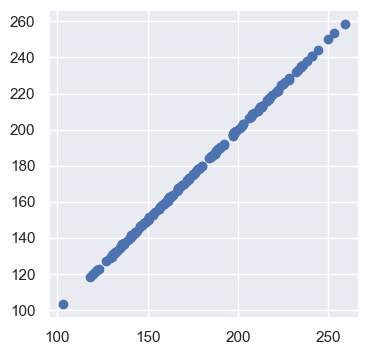

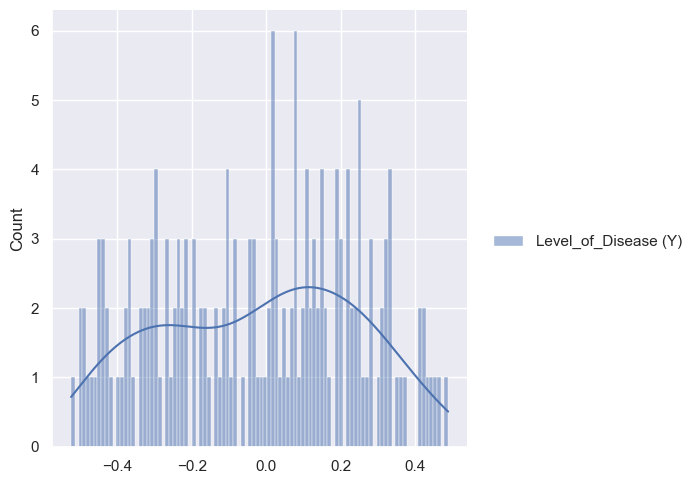

In [261]:
# With train data
reg_model = smf.OLS(endog = y_train, exog=x_train).fit() #unscaled x
print(reg_model.summary())
# With test data
reg_model = smf.OLS(endog = y_test, exog=x_test).fit() #unscaled X
print('\n++++++++++++++++++++++++++++++++ WITH TEST DATA ++++++++++++++++++++++++++++++++\n')
print(reg_model.summary())

# Check linearity
plt.scatter(y_test,  pred_y_test)
plt.show()
# Normality of Residual
sns.displot((y_test - pred_y_test), bins=100,kde=True)
plt.show()

1) Linearity - Satisfied<br>
2) Normality of Residuals- Satisfied/notSatisfied(confusion)<br>
3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)<br>
4) No autocorrelation - Satisfied [Durbin-Watson values are in the vicinity of the value 2 : If the value are between 1.5-2.5, Autocorrelation is likely not present]<br>
5) No or little Multicollinearity - satisfied

### Lasso (L1 reguralization):


In [262]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train) #unscaled x
print("Lasso Model :", (lasso.coef_))
pred_y_train_lasso = lasso.predict(x_train)
pred_y_test_lasso = lasso.predict(x_test)
lasso_25_r2_train = r2_score(y_train, pred_y_train_lasso)
print("Training Accuracy :", lasso_25_r2_train)
print()
lasso_25_r2_test = r2_score(y_test, pred_y_test_lasso)
print("Test Accuracy :", lasso_25_r2_test)

Lasso Model : [0.46653349 0.54833318 1.49944471 0.00511403 1.25002631 0.02601878]
Training Accuracy : 0.9999272838830082

Test Accuracy : 0.9999407926797479


### Ridge (L2 Regularization):

In [263]:
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train) #unscaled x
print("Ridge Model :", (ridge.coef_))
pred_y_train_ridge = ridge.predict(x_train)
pred_y_test_ridge = ridge.predict(x_test)
ridge_25_r2_train = r2_score(y_train, pred_y_train_ridge)
print("Training Accuracy :", ridge_25_r2_train)
print()
ridge_25_r2_test =  r2_score(y_test, pred_y_test_ridge)
print("Test Accuracy :", ridge_3_r2_test)

Ridge Model : [[0.46647499 0.54847816 1.49965919 0.00510617 1.25193275 0.02673452]]
Training Accuracy : 0.9999275461843357

Test Accuracy : 0.999937861086465


### ElasticNet

In [264]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
pred_y_train_elastic = elastic.predict(x_train)
pred_y_test_elastic = elastic.predict(x_test)
elastic_25_r2_train =  r2_score(y_train, pred_y_train_elastic)
print("Training Accuracy :",elastic_25_r2_train)
print()
elastic_25_r2_test = r2_score(y_test, pred_y_test_elastic)
print("Test Accuracy :", elastic_25_r2_test)

Training Accuracy : 0.9999246963621592

Test Accuracy : 0.999938472985462


### Gradient Descent

In [265]:
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor() #Stochastic Gradient Descent
gd.fit(x_train, y_train)
pred_y_gd_train = gd.predict(x_train)
pred_y_gd_test = gd.predict(x_test)
r2_25_Train_accuracy_gd =r2_score(y_train, pred_y_gd_train)
r2_25_Test_accuracy_gd = r2_score(y_test, pred_y_gd_test)

print("GD Trainging Accuracy :", r2_25_Train_accuracy_gd  )
print("GD Test Accuracy      :",r2_25_Test_accuracy_gd  )

x_train shape : (523, 6) 
x_test shape : (175, 6) 
y_train shape : (523, 1) 
y_test shape : (175, 1)

GD Trainging Accuracy : 0.9999273242296597
GD Test Accuracy      : 0.9999380925438707


C:\Users\DARIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **CASE- 3 : Test size = 0.2**

### Training Model - Multiple Linear Regression

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) #unscaled x
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

LR = LinearRegression()
LR.fit(x_train, y_train)
print("LR.coef_",LR.coef_,'LR.intercept_',LR.intercept_)

pred_y_train = LR.predict(x_train) #unscaled x
MLR_2_Train_r2 = r2_score(y_train, pred_y_train)
err_train = y_train - pred_y_train

pred_y_test = LR.predict(x_test)
MLR_2_Test_r2 = r2_score(y_test, pred_y_test)
print ('Train R2 score :', MLR_2_Train_r2,'\n' 'Test R2 Score   :', MLR_2_Test_r2)
err_test = y_test - pred_y_test

print('err_train.skew',err_train.skew(),'err_train.kurtosis',err_train.kurtosis())
print('err_test.skew',err_test.skew(),'err_test.kurtosis',err_test.kurtosis())

# mse, rmse, mape, accuracy, using formatted string literals

MSE = mean_squared_error(y_test,pred_y_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,pred_y_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

(558, 6) (140, 6) (558, 1) (140, 1)
LR.coef_ [[0.46632542 0.54872576 1.4999712  0.00512001 1.25208878 0.02688124]] LR.intercept_ [8.26095653]
Train R2 score : 0.9999282484580742 
Test R2 Score   : 0.9999429425011322
err_train.skew Level_of_Disease (Y)   -0.037691
dtype: float64 err_train.kurtosis Level_of_Disease (Y)   -1.15081
dtype: float64
err_test.skew Level_of_Disease (Y)   -0.193472
dtype: float64 err_test.kurtosis Level_of_Disease (Y)   -0.944684
dtype: float64
1. mean squared error (MSE) =  0.0682331415719495
2. root mean squared error (RMSE) = 0.26121474225615504
3. mean absolute percentage error (MAPE) = 0.0012974251943940847
4. accuracy of the model = 99.8702574805606


### Training Model - Ordinary Least Square (OLS) Method

                                  OLS Regression Results                                 
Dep. Variable:     Level_of_Disease (Y)   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          2.147e+06
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):                        0.00
Time:                          21:44:26   Log-Likelihood:                         -884.60
No. Observations:                   558   AIC:                                      1781.
Df Residuals:                       552   BIC:                                      1807.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

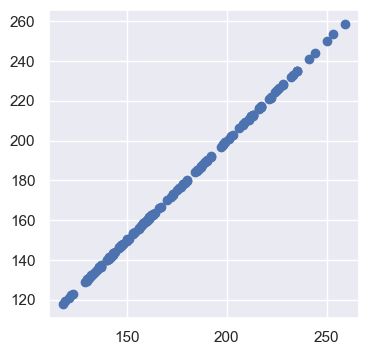

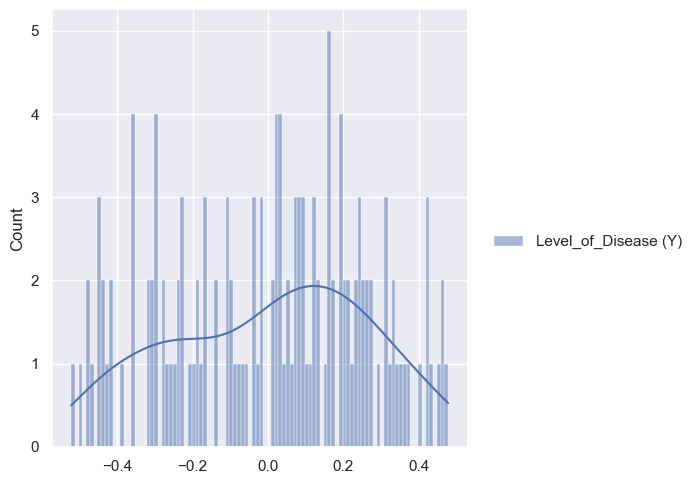

In [267]:
# With train data
reg_model = smf.OLS(endog = y_train, exog=x_train).fit() #unscaled x
print(reg_model.summary())
# With test data
reg_model = smf.OLS(endog = y_test, exog=x_test).fit() #unscaled X
print('\n++++++++++++++++++++++++++++++++ WITH TEST DATA ++++++++++++++++++++++++++++++++\n')
print(reg_model.summary())

# Check linearity
plt.scatter(y_test,  pred_y_test)
plt.show()
# Normality of Residual
sns.displot((y_test - pred_y_test), bins=100,kde=True)
plt.show()

1) Linearity - Satisfied<br>
2) Normality of Residuals- Satisfied/notSatisfied(confusion)<br>
3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)<br>
4) No autocorrelation - Satisfied [Durbin-Watson values are in the vicinity of the value 2 : If the value are between 1.5-2.5, Autocorrelation is likely not present]<br>
5) No or little Multicollinearity - satisfied

### Lasso (L1 reguralization):


In [268]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train) #unscaled x
print("Lasso Model :", (lasso.coef_))
pred_y_train_lasso = lasso.predict(x_train)
pred_y_test_lasso = lasso.predict(x_test)
lasso_2_r2_train = r2_score(y_train, pred_y_train_lasso)
print("Training Accuracy :", lasso_2_r2_train)
print()
lasso_2_r2_test = r2_score(y_test, pred_y_test_lasso)
print("Test Accuracy :", lasso_2_r2_test)

Lasso Model : [0.46637969 0.54855449 1.49976657 0.00513277 1.25012823 0.02619313]
Training Accuracy : 0.9999279855542897

Test Accuracy : 0.999942711689633


### Ridge (L2 Regularization):

In [269]:
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train) #unscaled x
print("Ridge Model :", (ridge.coef_))
pred_y_train_ridge = ridge.predict(x_train)
pred_y_test_ridge = ridge.predict(x_test)
ridge_2_r2_train = r2_score(y_train, pred_y_train_ridge)
print("Training Accuracy :", ridge_2_r2_train)
print()
ridge_2_r2_test = r2_score(y_test, pred_y_test_ridge)
print("Test Accuracy :", ridge_2_r2_test)

Ridge Model : [[0.46632551 0.54872578 1.49996922 0.00512031 1.25207472 0.02688146]]
Training Accuracy : 0.9999282484482384

Test Accuracy : 0.999942944409526


### ElasticNet

In [270]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
pred_y_train_elastic = elastic.predict(x_train)
pred_y_test_elastic = elastic.predict(x_test)
elastic_2_r2_train = r2_score(y_train, pred_y_train_elastic)
print("Training Accuracy :", elastic_2_r2_train)
print()
elastic_2_r2_test = r2_score(y_test, pred_y_test_elastic)
print("Test Accuracy :", elastic_2_r2_test)

Training Accuracy : 0.9999253663893751

Test Accuracy : 0.9999414180129697


### Gradient Descent

In [271]:
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor() #Stochastic Gradient Descent
gd.fit(x_train, y_train)
pred_y_gd_train = gd.predict(x_train)
pred_y_gd_test = gd.predict(x_test)
r2_2_Train_accuracy_gd =r2_score(y_train, pred_y_gd_train)
r2_2_Test_accuracy_gd = r2_score(y_test, pred_y_gd_test)

print("GD Trainging Accuracy :", r2_2_Train_accuracy_gd  )
print("GD Test Accuracy      :",r2_2_Test_accuracy_gd  )

x_train shape : (523, 6) 
x_test shape : (175, 6) 
y_train shape : (523, 1) 
y_test shape : (175, 1)

GD Trainging Accuracy : 0.999927347623113
GD Test Accuracy      : 0.9999376222525114


C:\Users\DARIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [274]:
row_label=['MLR', 'OLS','Lasso', 'Ridge','ElasticNet', 'Gradient Descent','MLR','OLS' , 'Lasso','Ridge','ElasticNet','GradientDescent','MLR', 'OLS','Lasso', 'Ridge','ElasticNet', 'Gradient Descent']
accuracy_data ={'Test_size' : [0.3,0.3,0.3,0.3,0.3,0.3,0.25,0.25,0.25,0.25,0.25,0.25,0.2,0.2,0.2,0.2,0.2,0.2], 
                'R2_Train_Accuracy' : [MLR_3_Train_r2,1,lasso_3_r2_train,ridge_3_r2_train,elastic_3_r2_train,Train_3_accuracy_gd,MLR_25_Train_r2,1,lasso_25_r2_train,ridge_25_r2_train,elastic_25_r2_train,r2_25_Train_accuracy_gd,MLR_2_Train_r2,1,lasso_2_r2_train,ridge_2_r2_train,elastic_2_r2_train,r2_2_Train_accuracy_gd],
               'R2_Test_Accuracy' :   [MLR_3_Test_r2,1,lasso_3_r2_test,ridge_3_r2_test,elastic_3_r2_test,Test_3_accuracy_gd,MLR_25_Test_r2,1,lasso_25_r2_test,ridge_25_r2_test,elastic_25_r2_test,r2_25_Test_accuracy_gd,MLR_2_Test_r2,1,lasso_2_r2_test,ridge_2_r2_test,elastic_2_r2_test,r2_2_Test_accuracy_gd], }
accuracy_df =pd.DataFrame(accuracy_data, index =row_label)
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy
MLR,0.30,0.999928,0.999938
OLS,0.30,1.000000,1.000000
Lasso,0.30,0.999928,0.999937
Ridge,0.30,0.999928,0.999938
ElasticNet,0.30,0.999925,0.999934
Gradient Descent,0.30,0.999928,0.999934
MLR,0.25,0.999928,0.999941
OLS,0.25,1.000000,1.000000
Lasso,0.25,0.999927,0.999941
Ridge,0.25,0.999928,0.999941


In [275]:
accuracy_df['variance']= abs(accuracy_df['R2_Train_Accuracy'] - accuracy_df['R2_Test_Accuracy'])*100
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy,variance
MLR,0.30,0.999928,0.999938,0.000984
OLS,0.30,1.000000,1.000000,0.000000
Lasso,0.30,0.999928,0.999937,0.000952
Ridge,0.30,0.999928,0.999938,0.000984
ElasticNet,0.30,0.999925,0.999934,0.000922
Gradient Descent,0.30,0.999928,0.999934,0.000565
MLR,0.25,0.999928,0.999941,0.001395
OLS,0.25,1.000000,1.000000,0.000000
Lasso,0.25,0.999927,0.999941,0.001351
Ridge,0.25,0.999928,0.999941,0.001395


Gradient Descent with split size 0.30 has train accuracy 0.999928 and test accuracy 0.999934 having variance 0.000565 gives the best result